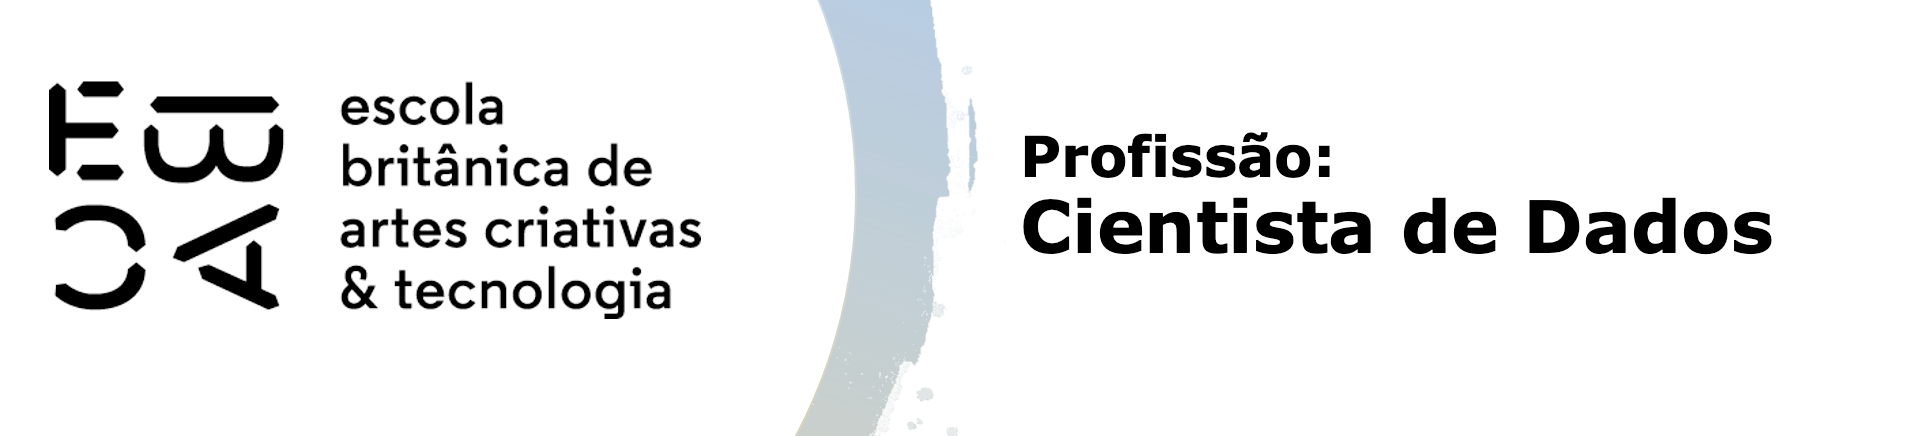

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

In [58]:
custom_params = {"axes.spines.right":False,"axes.spines.top":False}
sns.set_theme(style='ticks',rc=custom_params)
color_palette = ['#023047','#e85d04',"#0077b6","#ff8200","#0096c7",'#ff9c33']
sns.set_palette(sns.color_palette(color_palette))
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

In [59]:
df = pd.read_csv('online_shoppers_intention.csv')

In [60]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [61]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

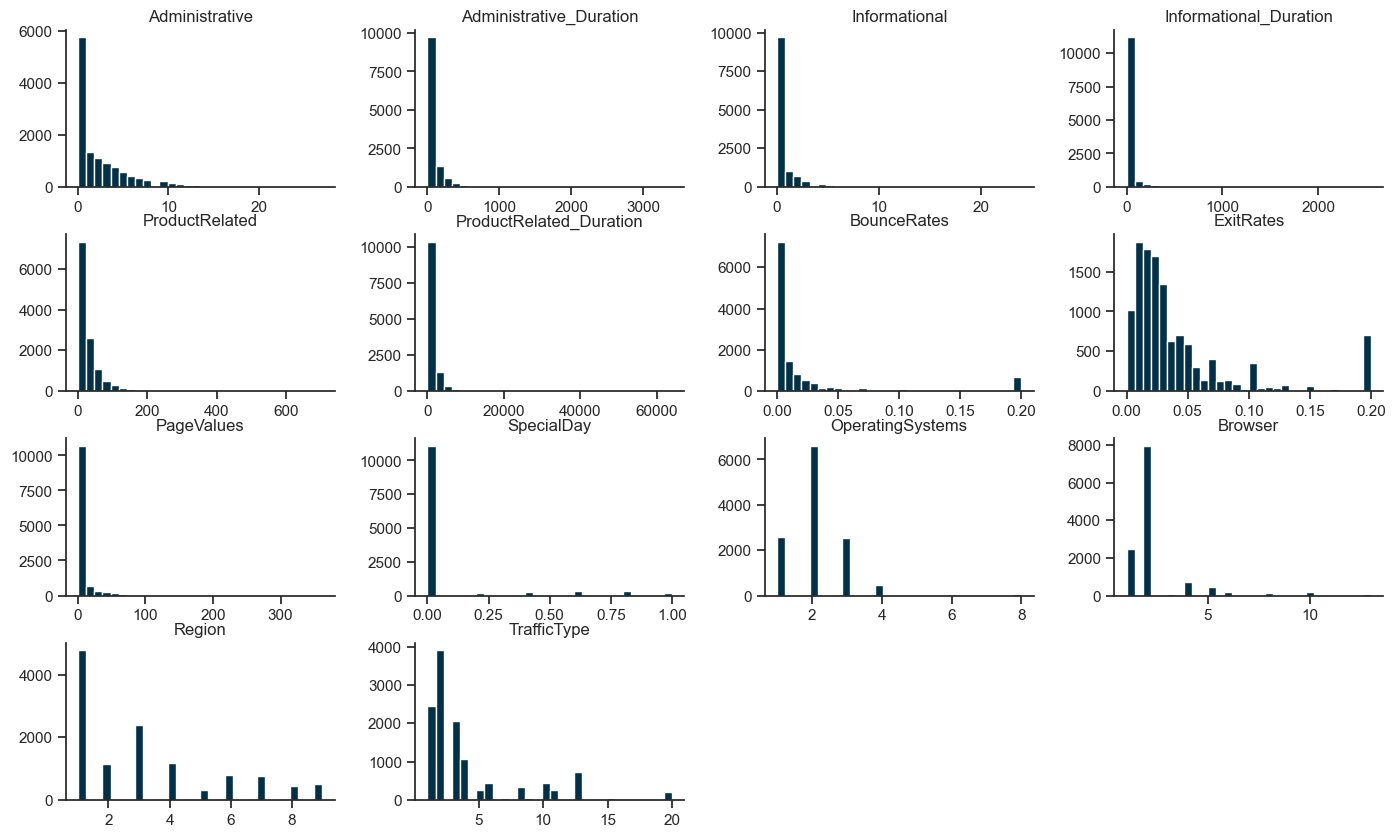

In [64]:
df.hist(bins=30,figsize=(17,10),grid=False);

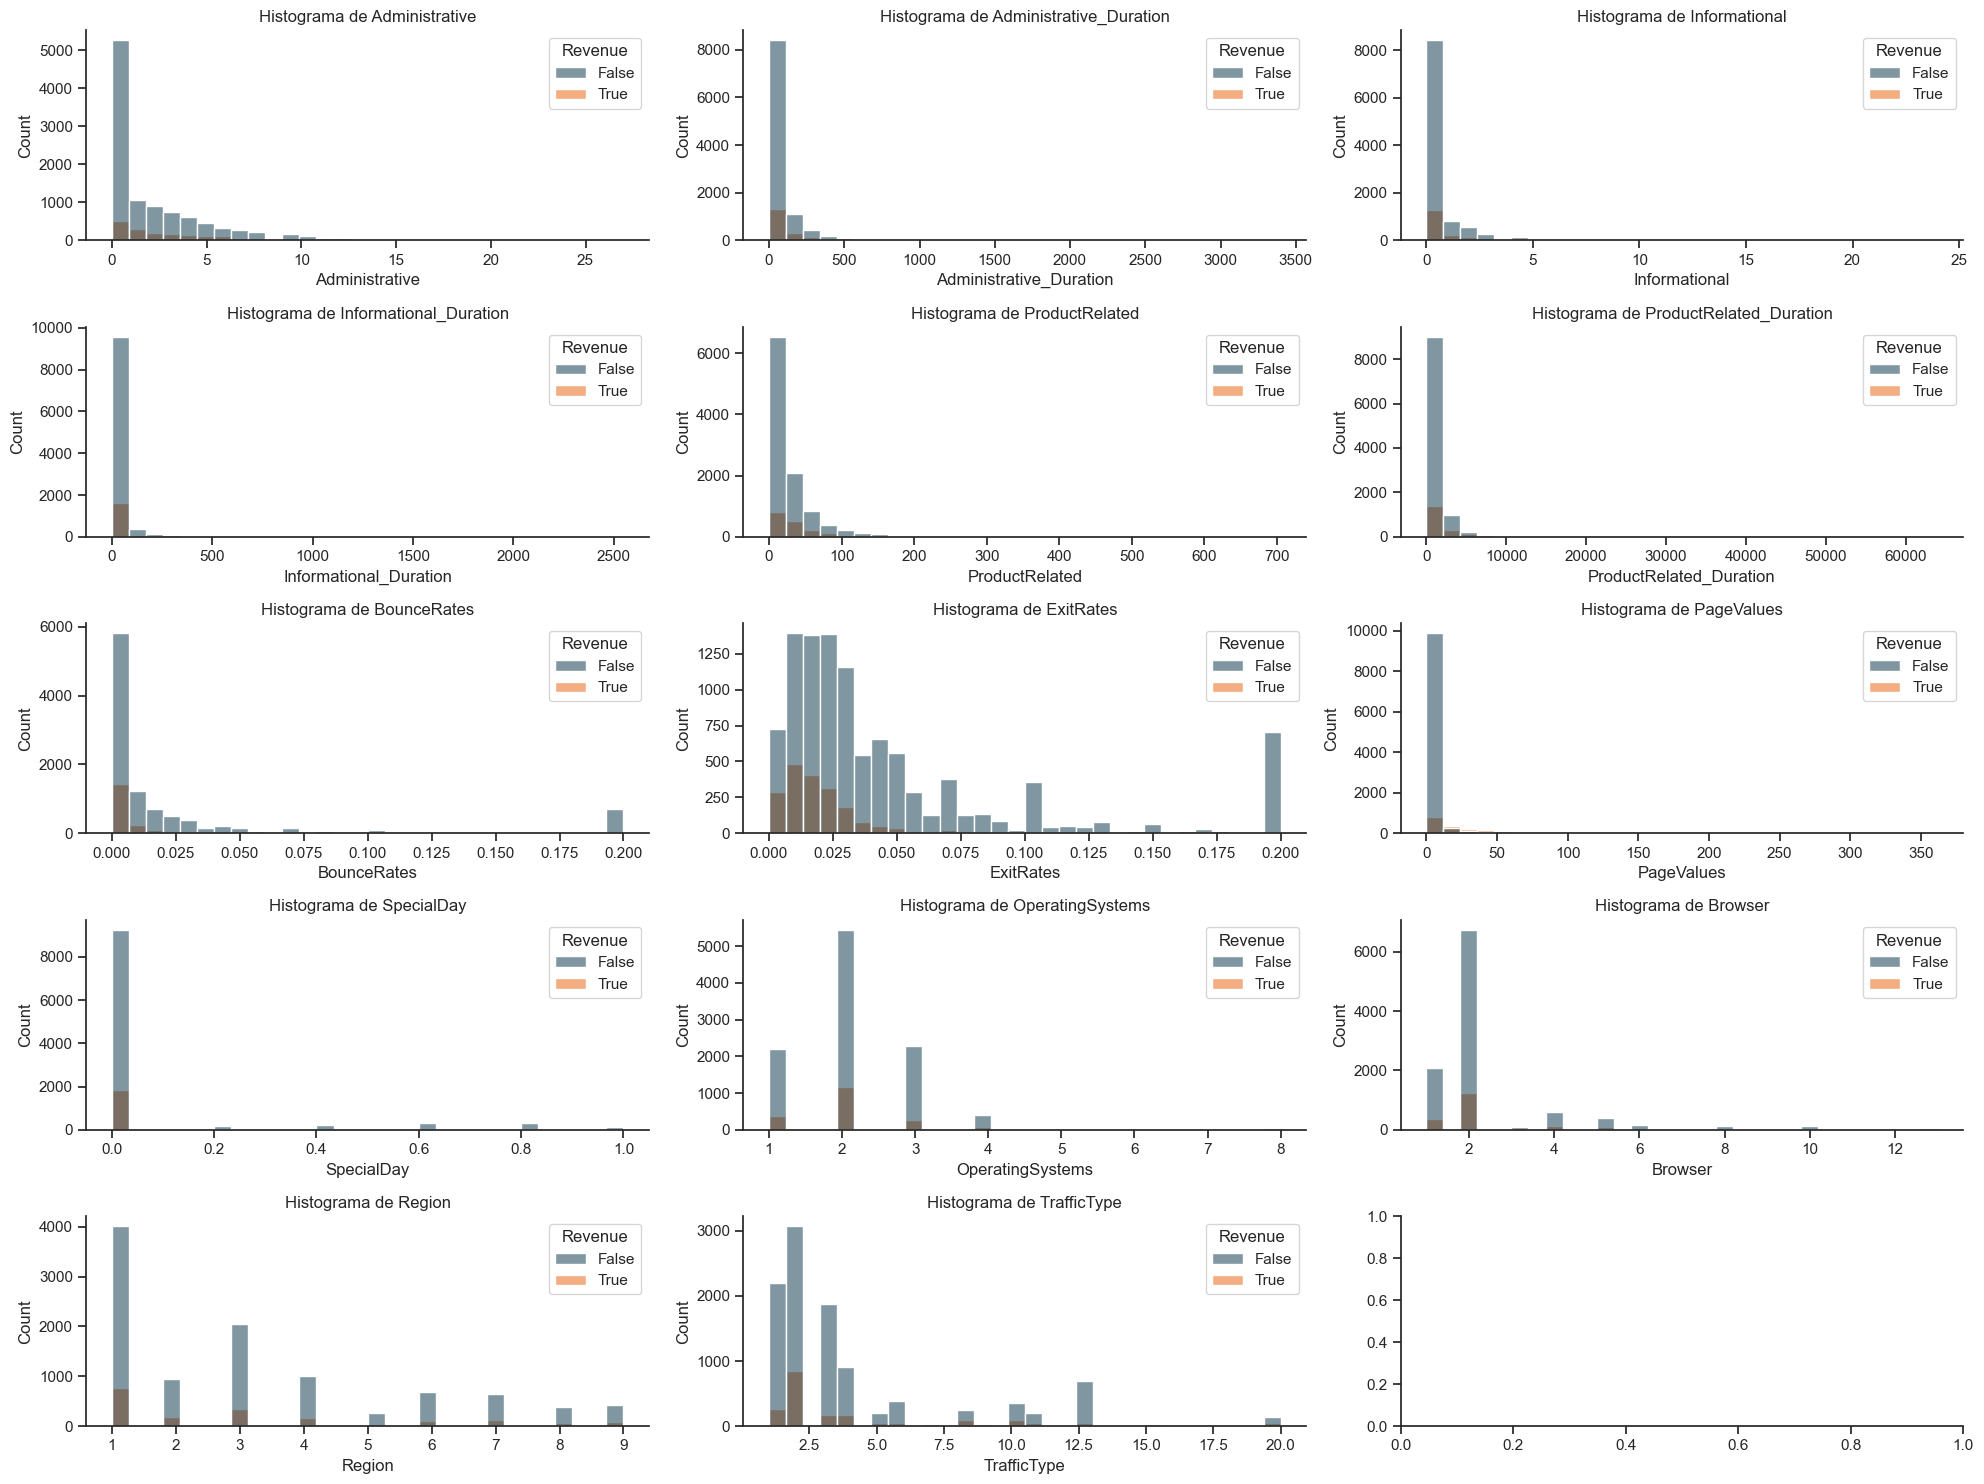

In [123]:
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)

fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='Revenue', bins=30, ax=axes[i], kde=False)
    axes[i].set_title(f'Histograma de {col}')
    axes[i].grid(False)

plt.tight_layout()
plt.show()



In [65]:
df.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

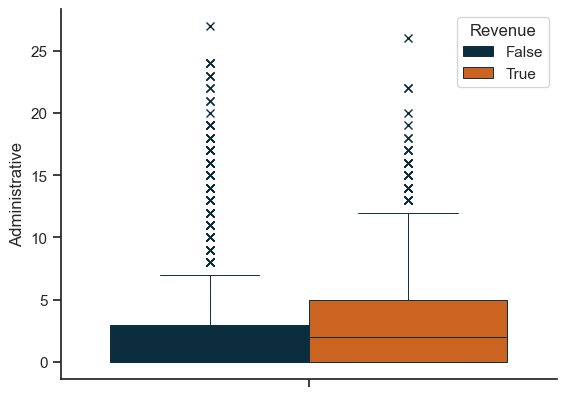

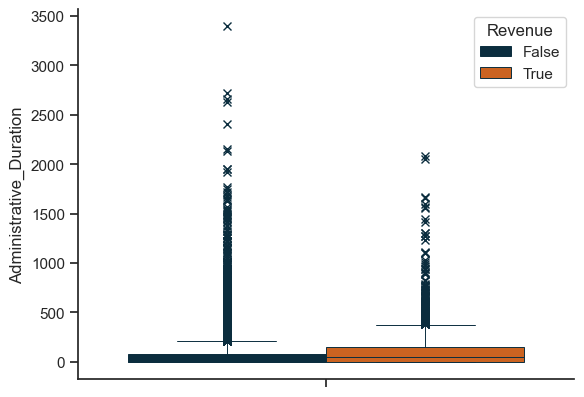

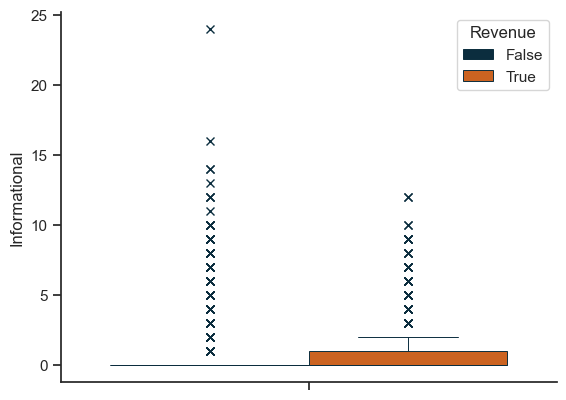

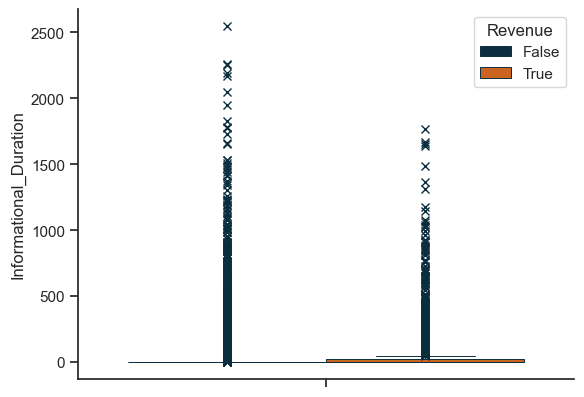

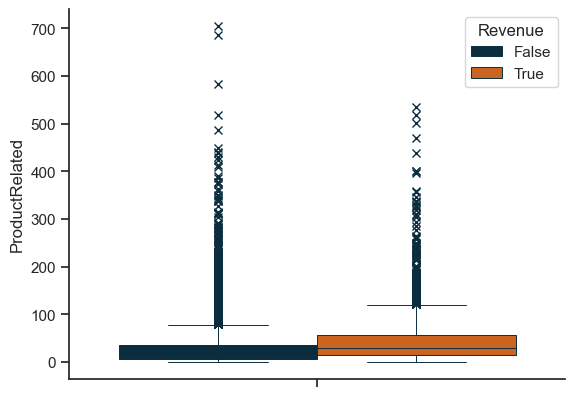

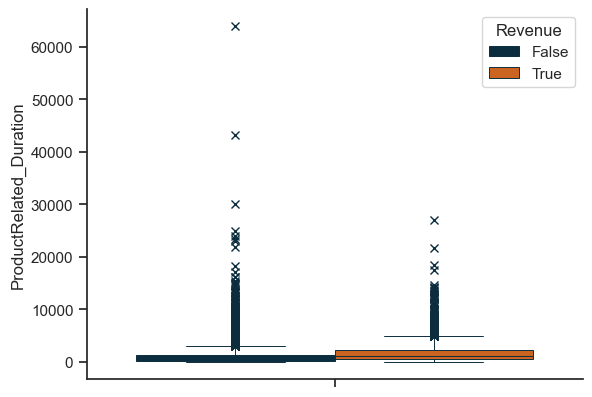

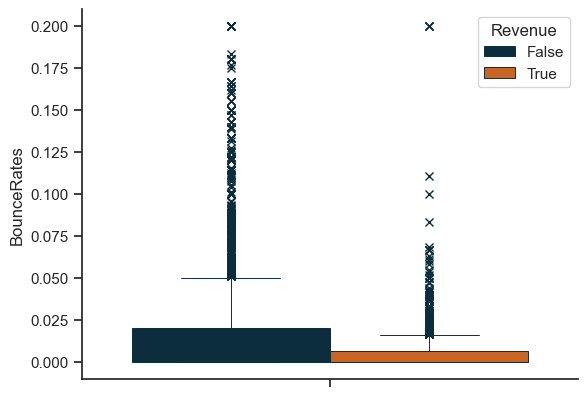

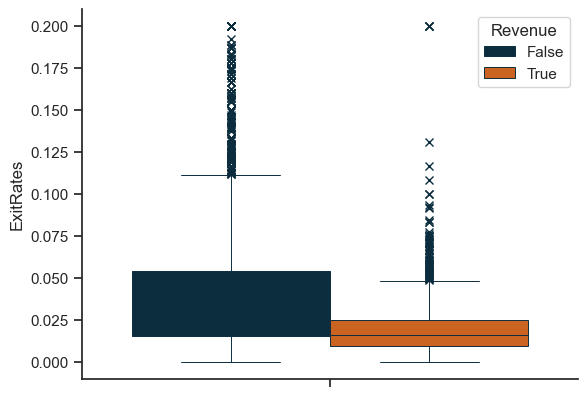

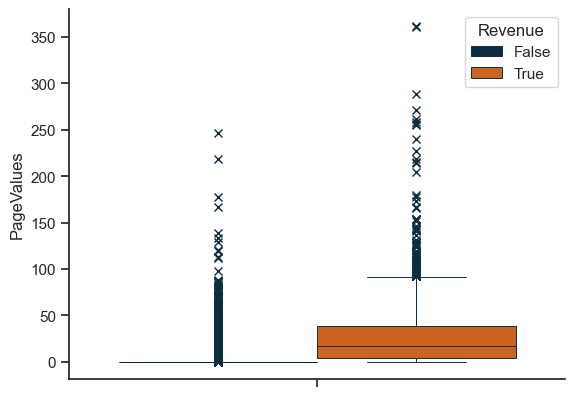

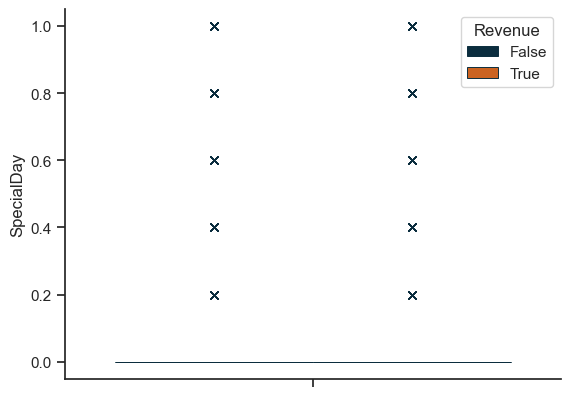

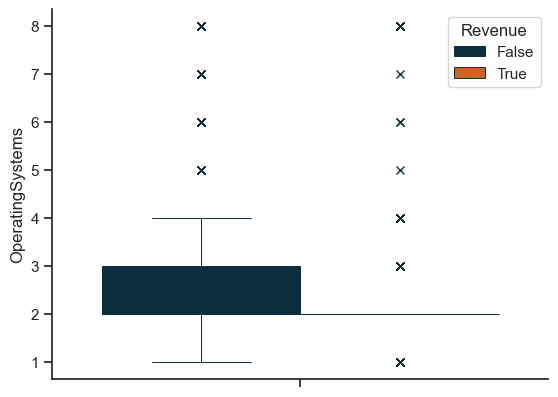

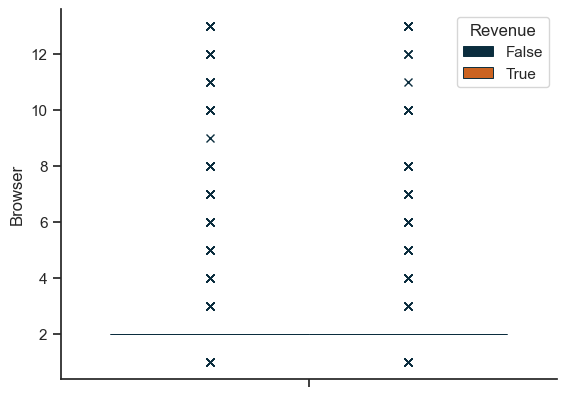

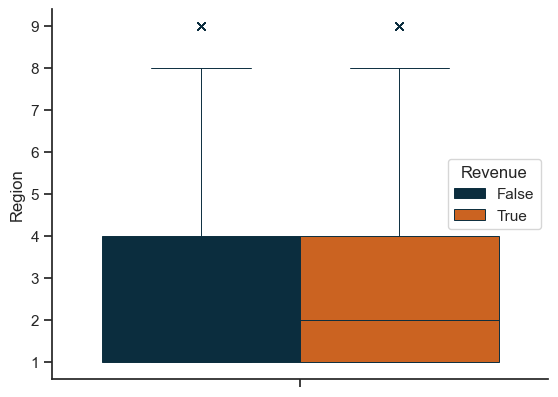

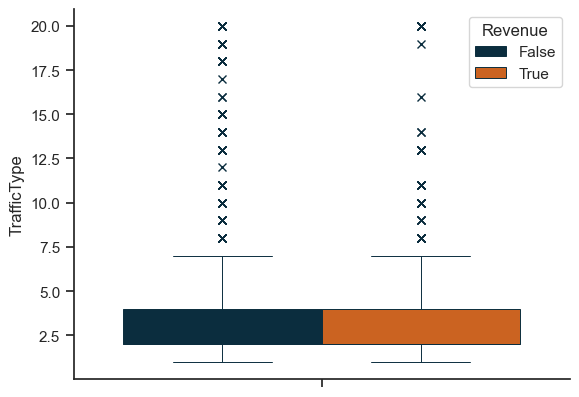

In [129]:
quant = df.select_dtypes(['int','float'])
quant_col = quant.columns.tolist()

for var in quant_col:
    fig = plt.figure()
    sns.boxplot(data=df,y=var, linecolor="#0b2d3e",hue='Revenue', linewidth=.7,flierprops={"marker": "x"})
    plt.show()

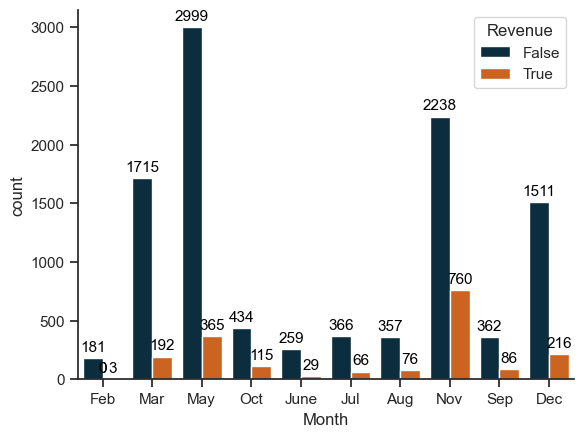

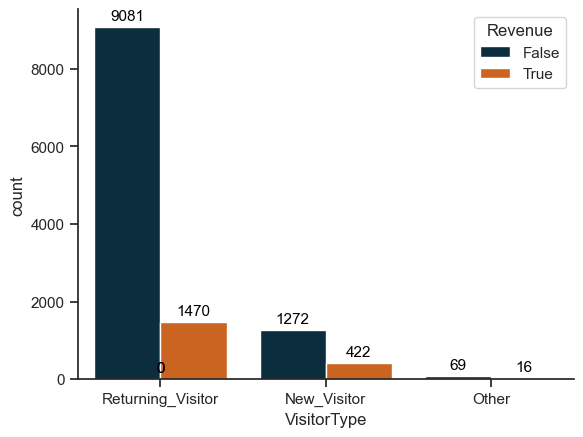

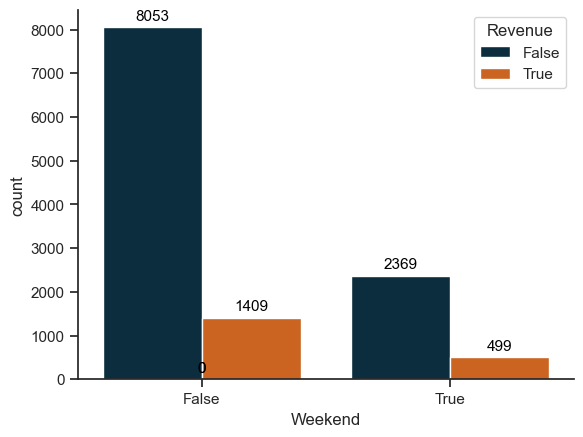

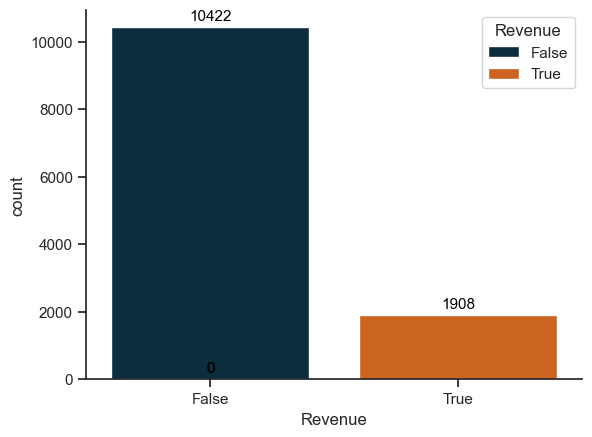

In [131]:
cat = df.select_dtypes(['bool','object'])
cat_var = cat.columns.tolist()
for var in cat_var:
    fig,ax = plt.subplots()
    ax = sns.countplot(data=df,x=var,hue='Revenue')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize = 11, color = 'black', xytext = (0, 5), 
                textcoords = 'offset points')
    plt.show()

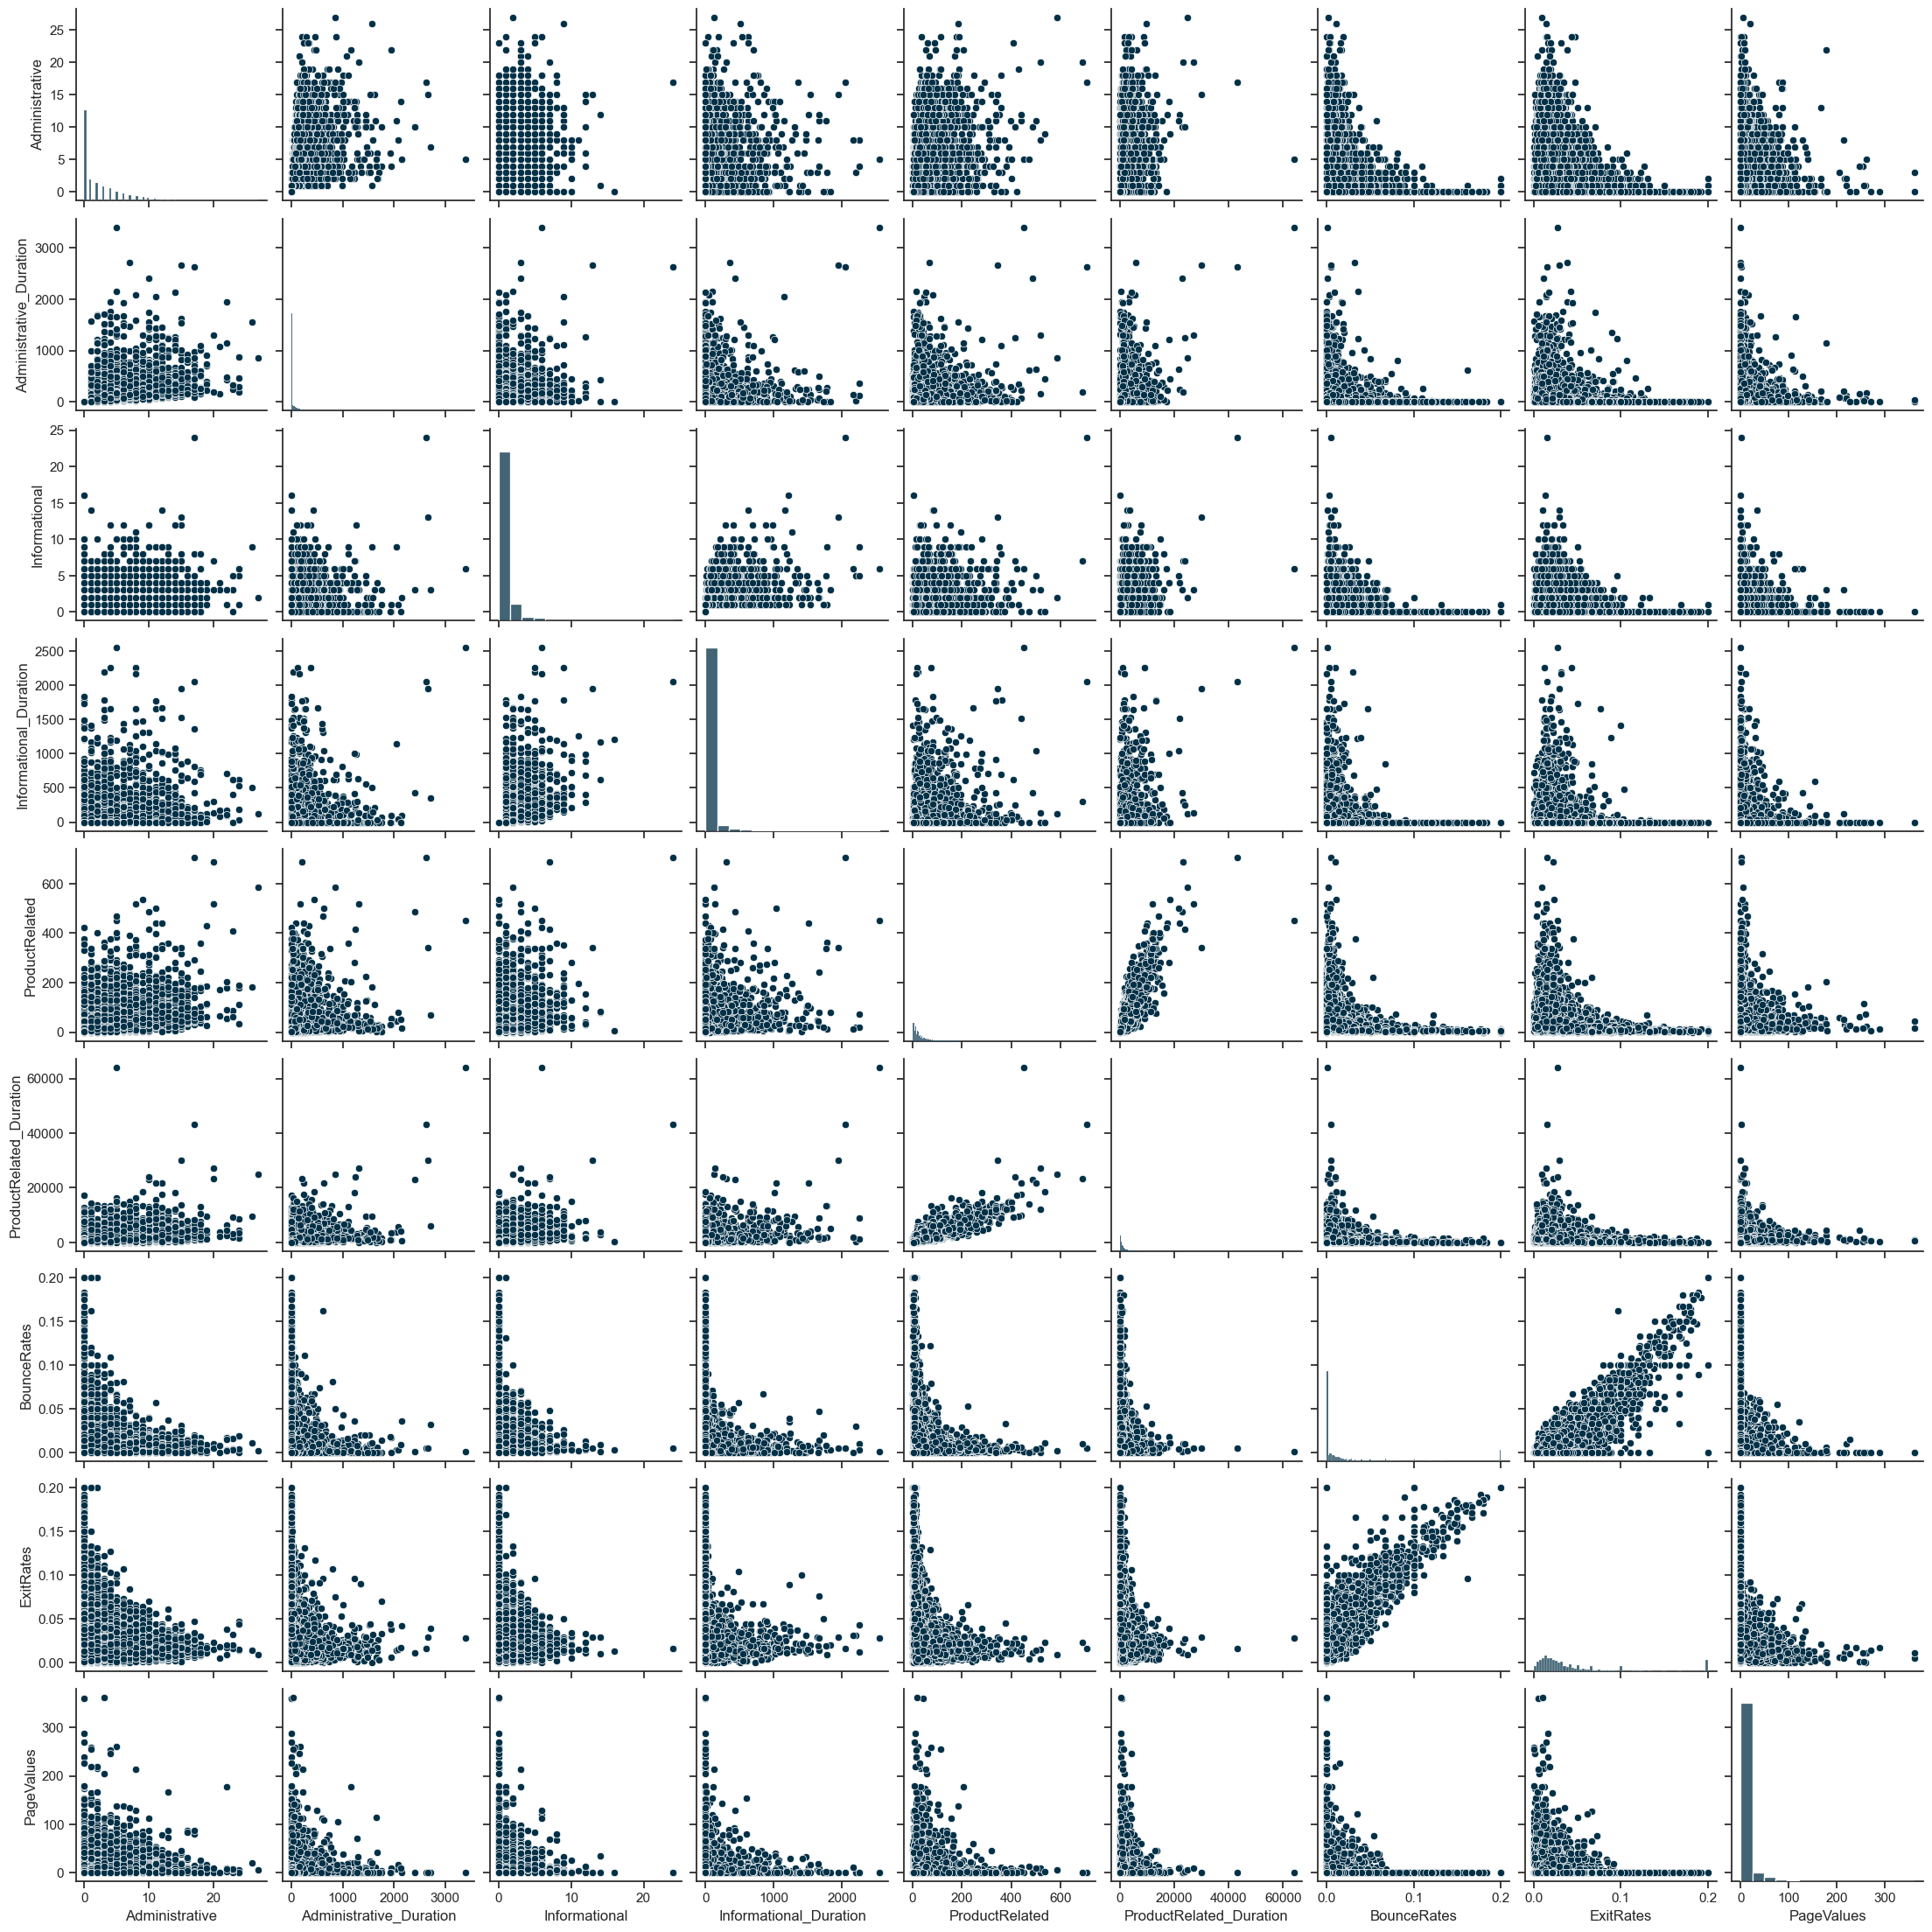

In [68]:
sns.pairplot(quant.iloc[:,0:9])

In [69]:
df_scaled = quant.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(data=df_scaled,columns=quant_col)
df_scaled

Administrative  Administrative_Duration  Informational  \
0           -0.696993                -0.457191      -0.396478   
1           -0.696993                -0.457191      -0.396478   
2           -0.696993                -0.457191      -0.396478   
3           -0.696993                -0.457191      -0.396478   
4           -0.696993                -0.457191      -0.396478   
...               ...                      ...            ...   
12325        0.206173                 0.363075      -0.396478   
12326       -0.696993                -0.457191      -0.396478   
12327       -0.696993                -0.457191      -0.396478   
12328        0.507228                -0.032916      -0.396478   
12329       -0.696993                -0.457191      -0.396478   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.244931       -0.691003                -0.624348   
1                   -0.244931       -0.668518                -0.590903   
2                   -0.244931       -0.691003                -0.624348   
3                   -0.244931       -0.668518                -0.622954   
4                   -0.244931       -0.488636                -0.296430   
...                       ...             ...                      ...   
12325               -0.244931        0.478227                 0.307822   
12326               -0.244931       -0.601062                -0.380957   
12327               -0.244931       -0.578577                -0.528063   
12328               -0.244931       -0.376210                -0.443536   
12329               -0.244931       -0.646033                -0.613243   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
0         3.667189   3.229316   -0.317178   -0.308821         -1.233426   
1        -0.457683   1.171473   -0.317178   -0.308821         -0.136078   
2         3.667189   3.229316   -0.317178   -0.308821          2.058618   
3         0.573535   1.994610   -0.317178   -0.308821          0.961270   
4        -0.045196   0.142551   -0.317178   -0.308821          0.961270   
...            ...        ...         ...         ...               ...   
12325    -0.310366  -0.288966    0.342125   -0.308821          2.058618   
12326    -0.457683  -0.447364   -0.317178   -0.308821          0.961270   
12327     1.261014   0.897093   -0.317178   -0.308821          0.961270   
12328    -0.457683  -0.453140   -0.317178   -0.308821         -0.136078   
12329    -0.457683   0.485525   -0.317178   -0.308821          0.961270   

        Browser    Region  TrafficType  
0     -0.790293 -0.894178    -0.762629  
1     -0.207952 -0.894178    -0.514182  
2     -0.790293  2.437081    -0.265735  
3     -0.207952 -0.477771    -0.017289  
4      0.374389 -0.894178    -0.017289  
...         ...       ...          ...  
12325  2.121412 -0.894178    -0.762629  
12326 -0.207952 -0.894178     0.976499  
12327 -0.207952 -0.894178     2.218733  
12328 -0.207952 -0.061364     1.721839  
12329 -0.207952 -0.894178    -0.514182  

[12330 rows x 14 columns]

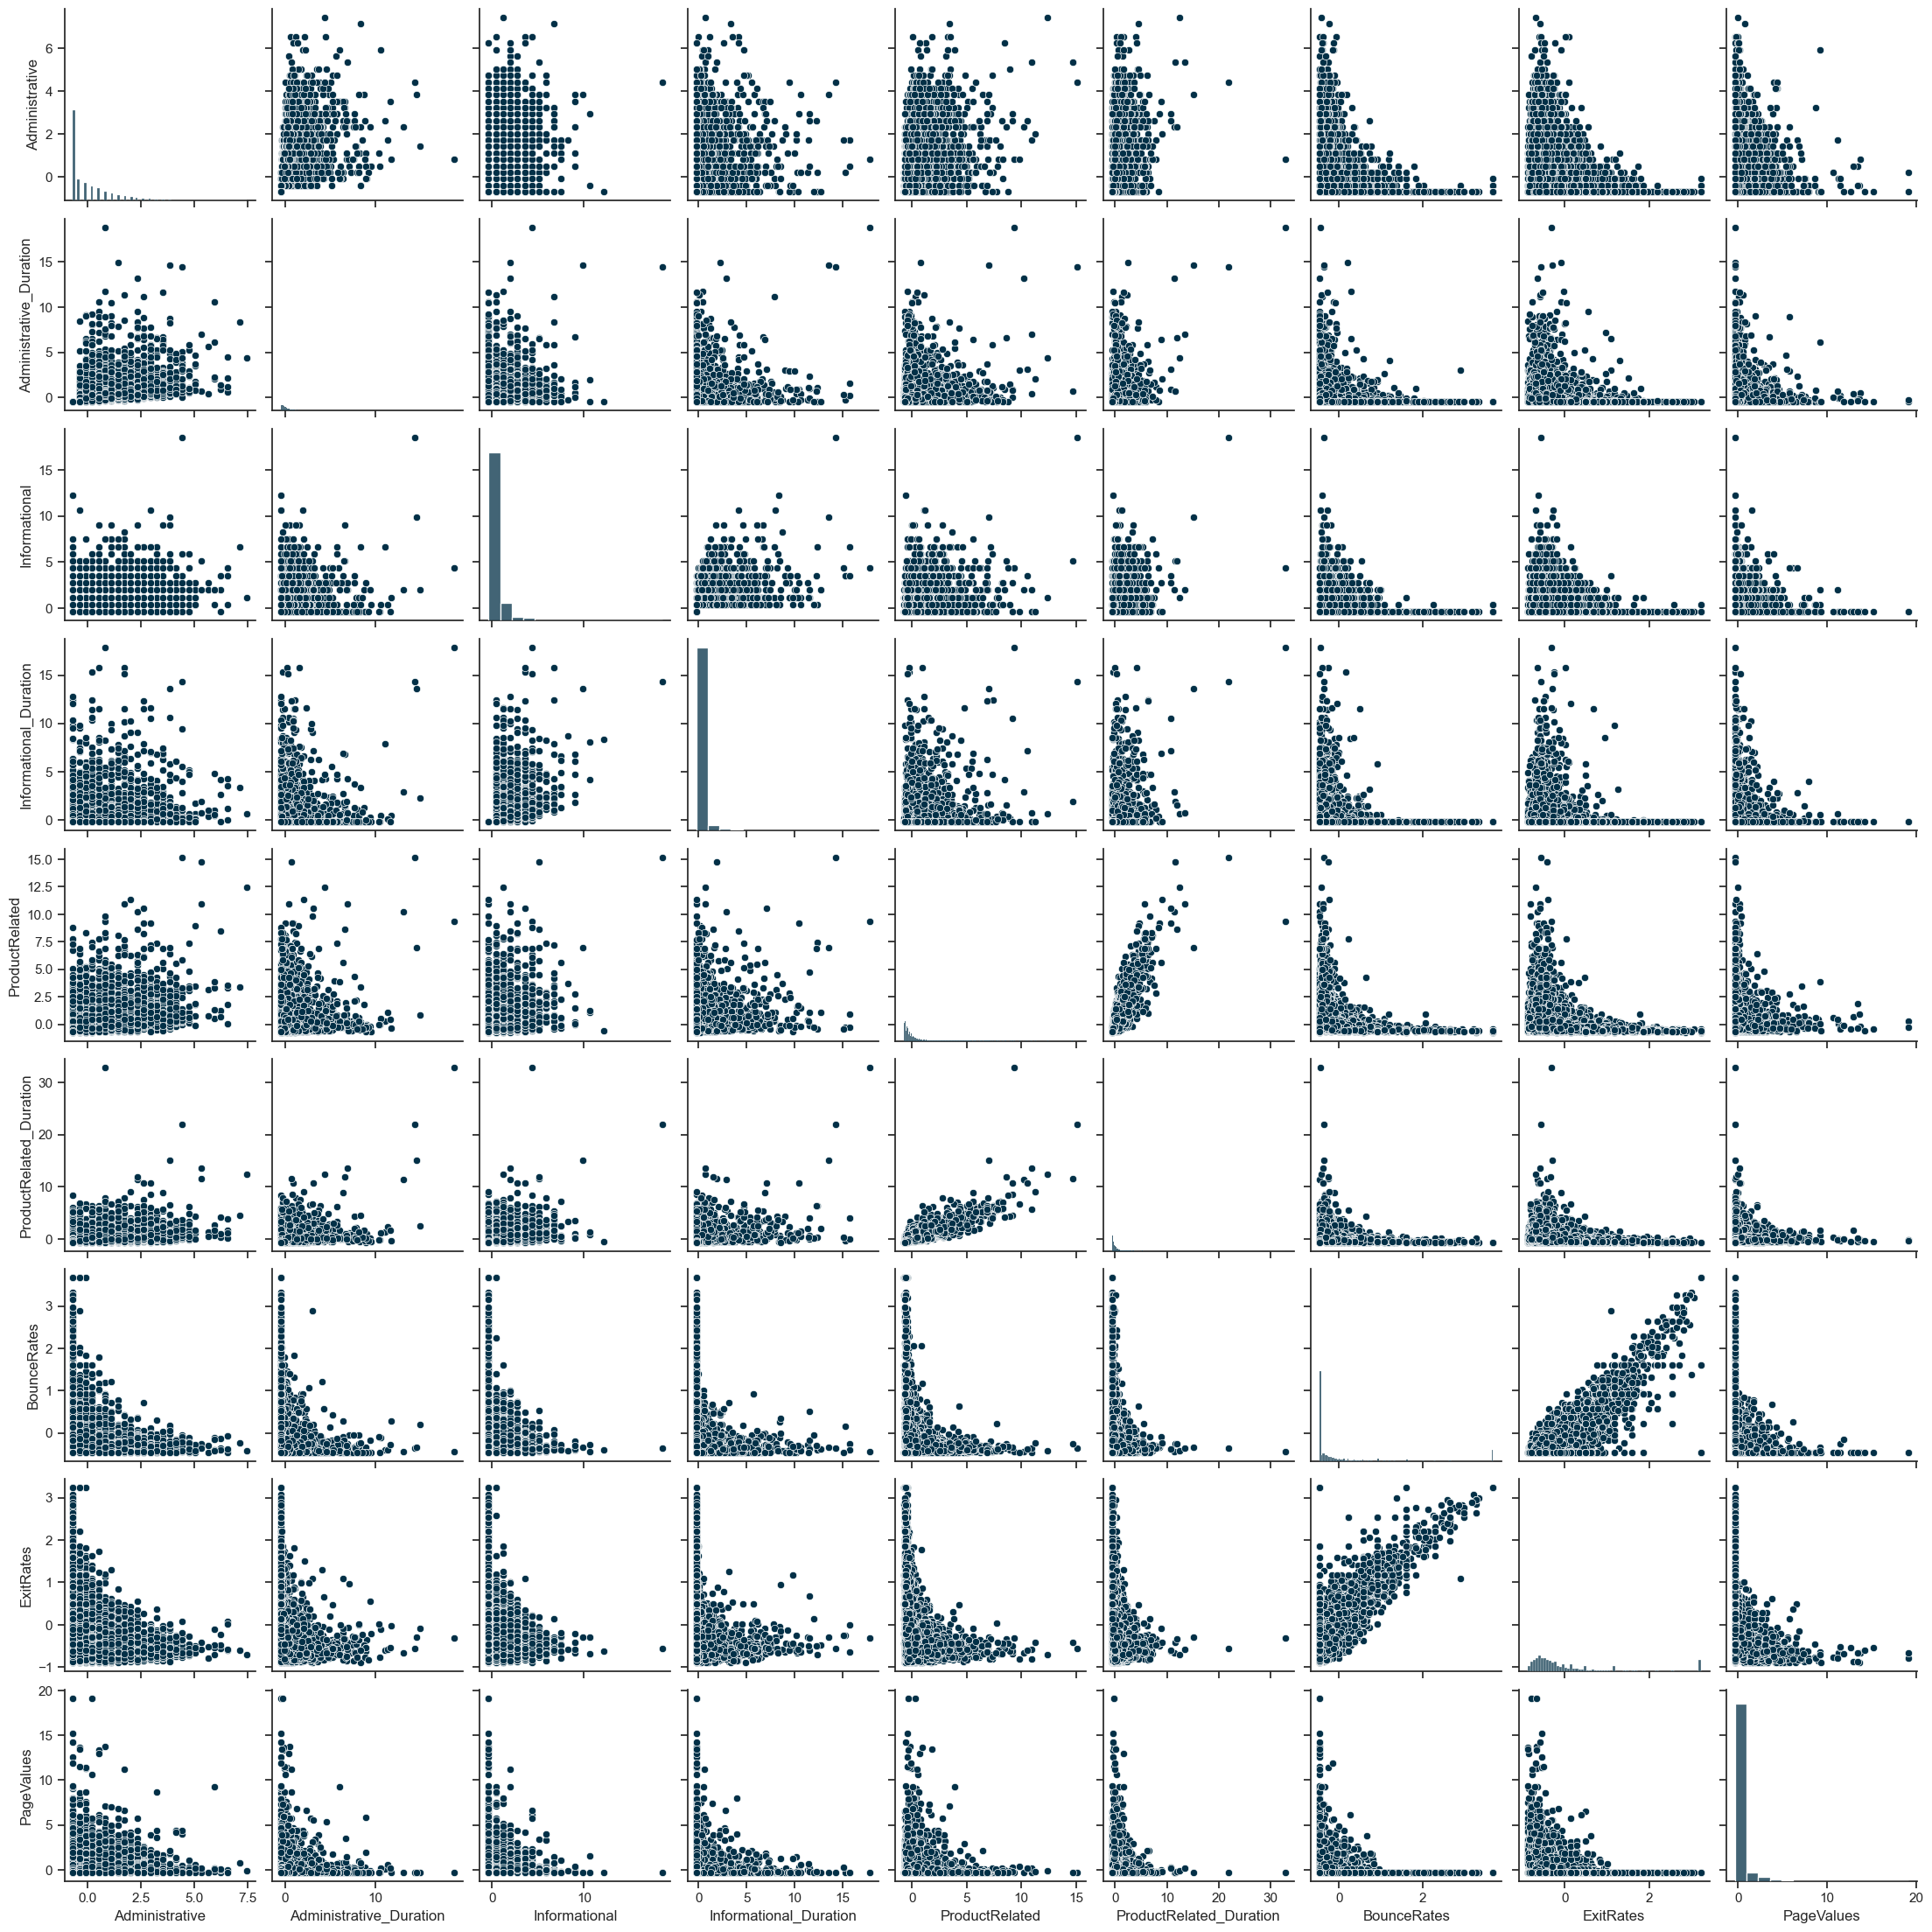

In [70]:
sns.pairplot(df_scaled.iloc[:,0:9]);

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [72]:
SQD = []
K = range(1,11)
for k in (K):
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    SQD.append(km.inertia_)

In [73]:
SQD

[172619.99999999997,
 151109.29115635337,
 142235.75247828133,
 121368.35542250372,
 111813.10367025307,
 107472.64269913777,
 100359.52271330464,
 93483.86132181966,
 88038.23332963797,
 87858.10294613987]

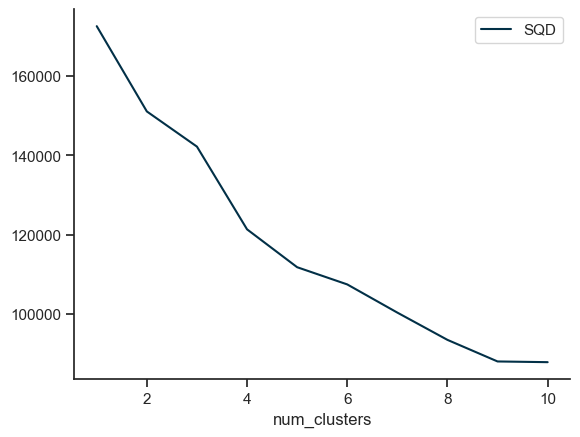

In [74]:
ploting = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
ploting.plot(x = 'num_clusters', y = 'SQD');

In [75]:
siluetas = []
max_clusters = 10

df_kmeans = df_scaled.copy()

for n_clusters in (range(2, max_clusters+1)):
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_scaled)  # Mantém df_scaled inalterado
    siluetas.append(silhouette_score(df_scaled, kmeans.labels_))
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    df_kmeans['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(kmeans.labels_, categories=nomes_grupos)


<Axes: xlabel='n_clusters'>

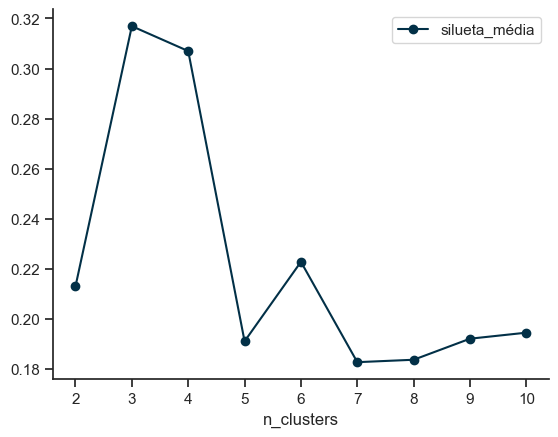

In [76]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

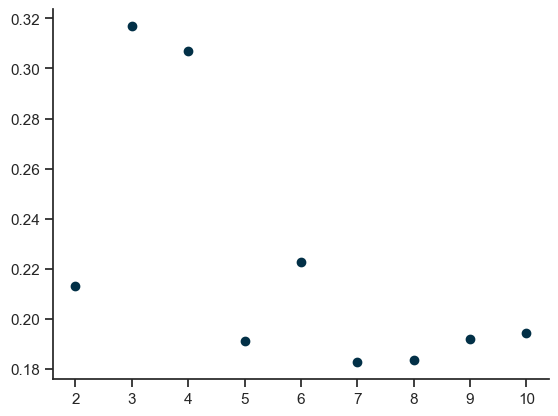

In [77]:
plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [79]:
df.Revenue.astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int32

In [80]:
df_kmeans['Revenue'] = df.Revenue.astype(int)

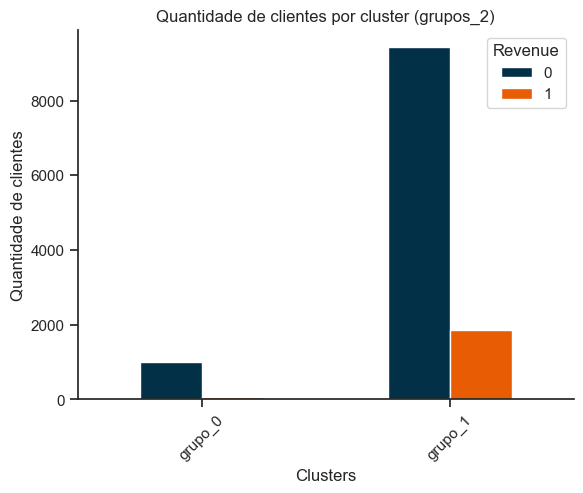

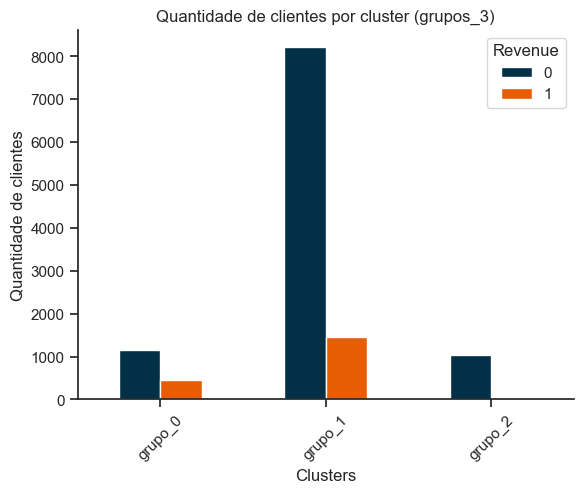

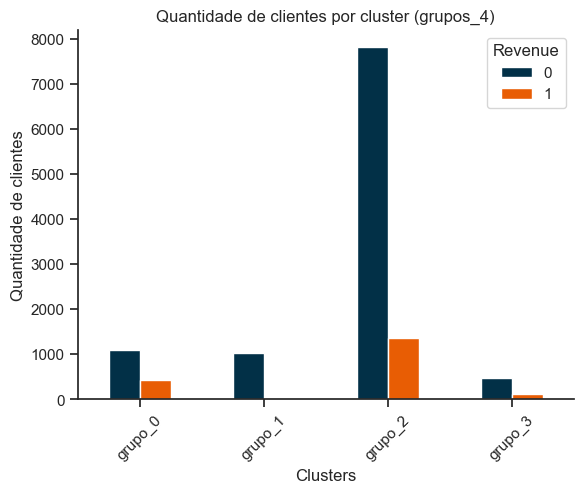

In [81]:

def cluster_barplot(data: pd.DataFrame, coluna_cluster: str, coluna_revenue: str = 'Revenue') -> None:

    if coluna_revenue in data.columns:
        df_agrupado = data.groupby([coluna_cluster, coluna_revenue],observed=False)[coluna_revenue].count().unstack()
    else:
        df_agrupado = data.groupby([coluna_cluster],observed=False)[coluna_cluster].count()

    ax = df_agrupado.plot.bar(rot=0)
    
    ax.set_ylabel('Quantidade de clientes')
    ax.set_xlabel('Clusters')
    plt.title(f'Quantidade de clientes por cluster ({coluna_cluster})')
    plt.xticks(rotation=45)
    plt.show()

# Exemplo de uso:
cluster_barplot(data=df_kmeans, coluna_cluster='grupos_2')
cluster_barplot(data=df_kmeans, coluna_cluster='grupos_3')
cluster_barplot(data=df_kmeans, coluna_cluster='grupos_4')


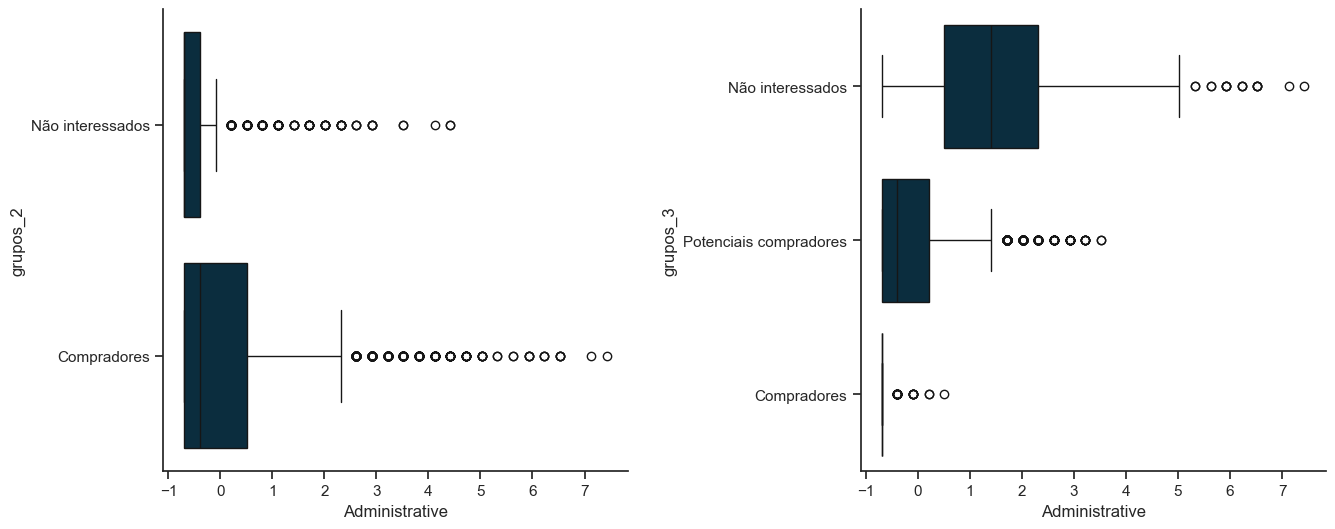

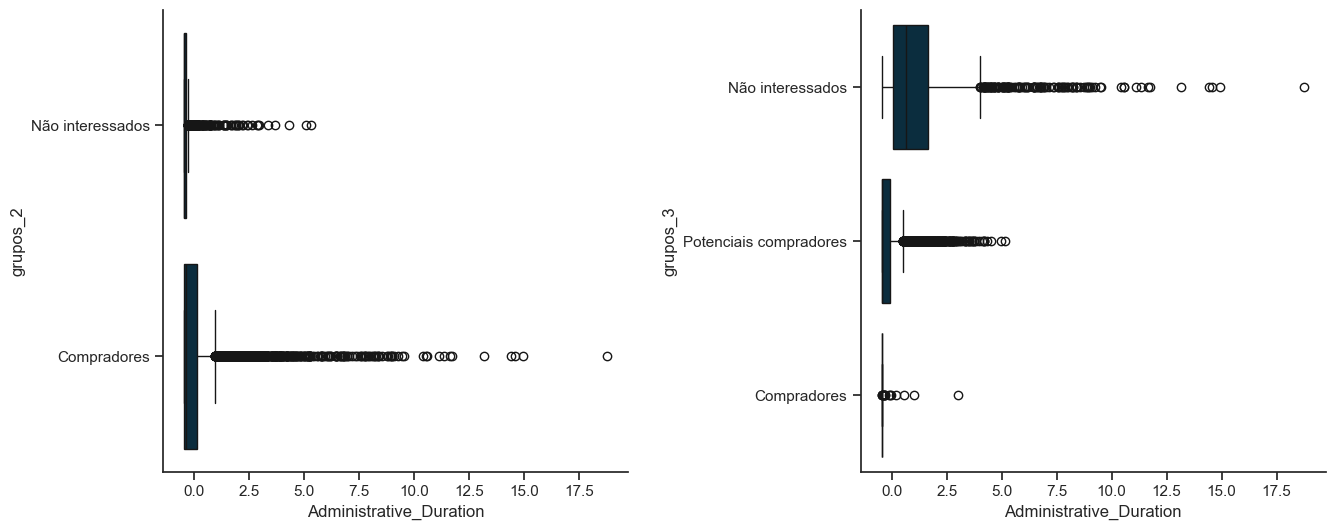

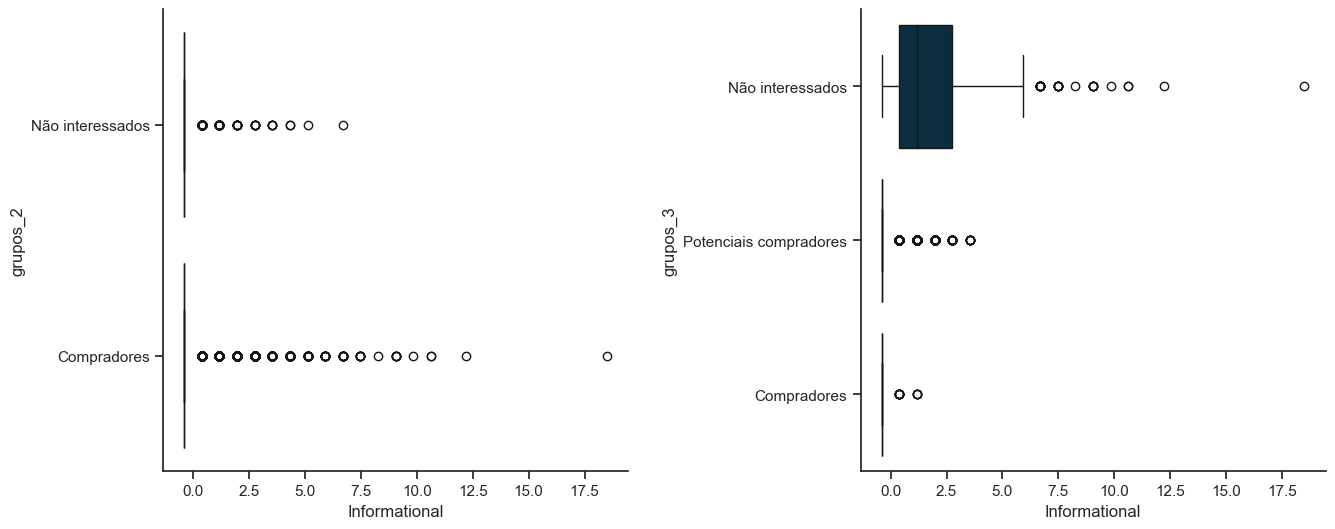

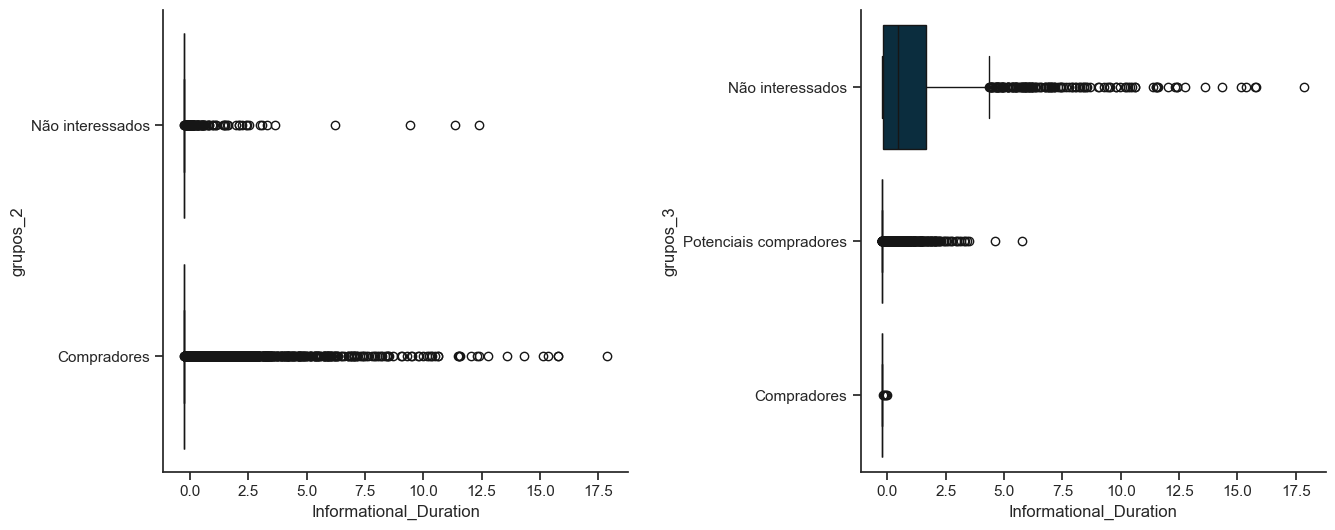

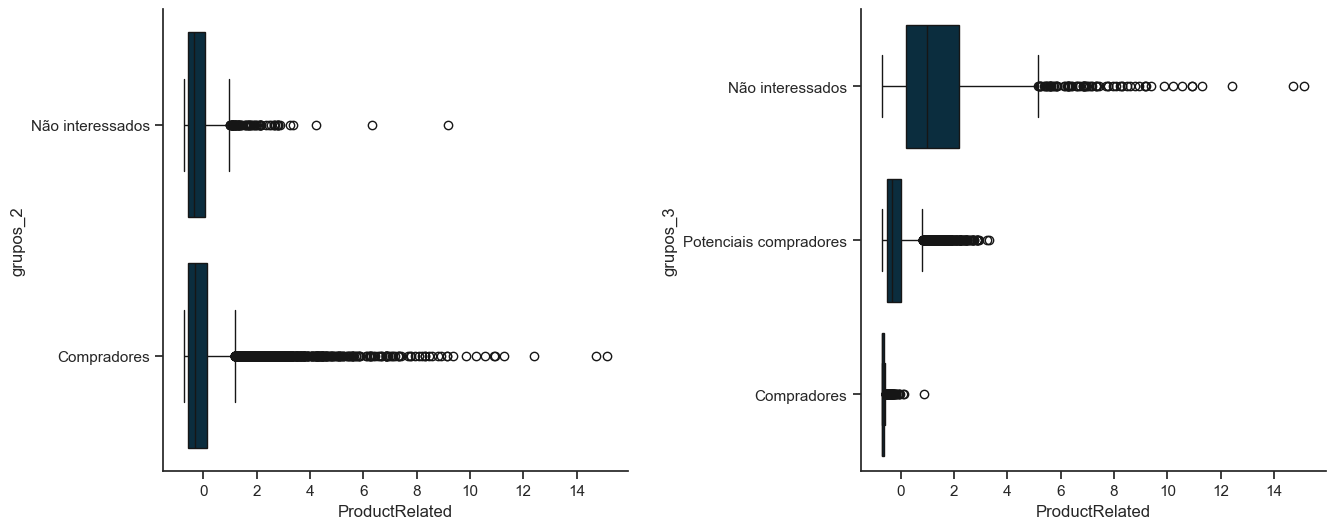

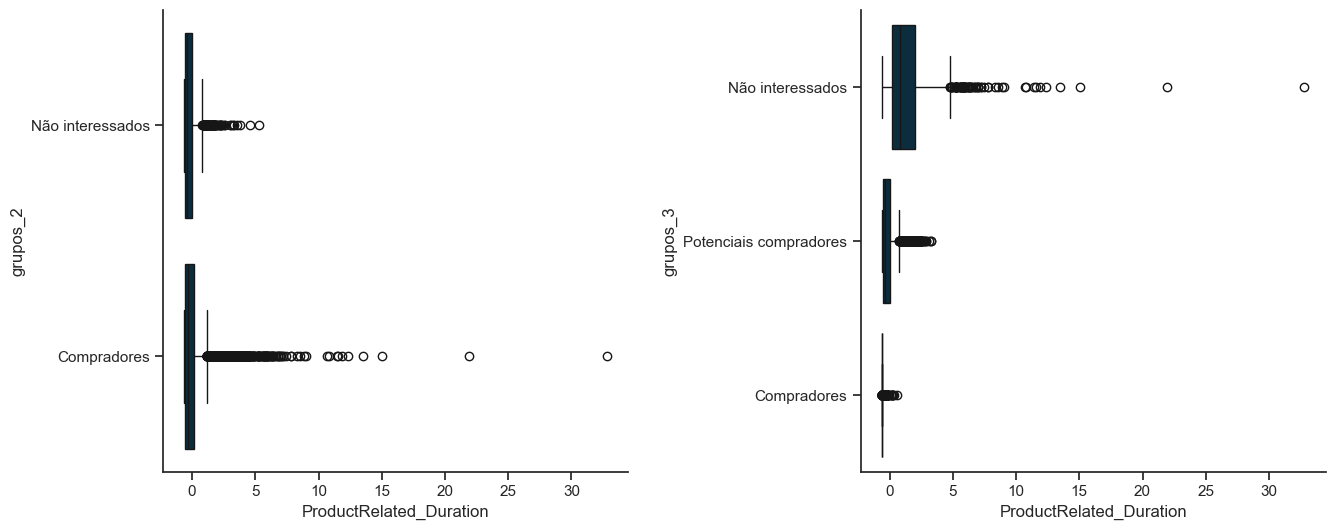

In [149]:
df_kmeans['grupos_2'] = df_kmeans['grupos_2'].cat.rename_categories({
    'grupo_0': 'Não interessados', 
    'grupo_1': 'Compradores'})

df_kmeans['grupos_3'] = df_kmeans['grupos_3'].cat.rename_categories({
    'grupo_0': 'Não interessados', 
    'grupo_1': 'Potenciais compradores', 
    'grupo_2': 'Compradores'})

df_kmeans['grupos_4'] = df_kmeans['grupos_4'].cat.rename_categories({
    'grupo_0': 'Não interessados', 
    'grupo_1': 'Moderadamente interessados', 
    'grupo_2': 'Potenciais compradores',
    'grupo_3': 'Compradores'})

colunas = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
           'ProductRelated', 'ProductRelated_Duration']

for n in range(6):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    
    sns.boxplot(data=df_kmeans, x=colunas[n], y='grupos_2', ax=ax[0])
    sns.boxplot(data=df_kmeans, x=colunas[n], y='grupos_3', ax=ax[1])
    plt.subplots_adjust(wspace=0.5)

    plt.show()

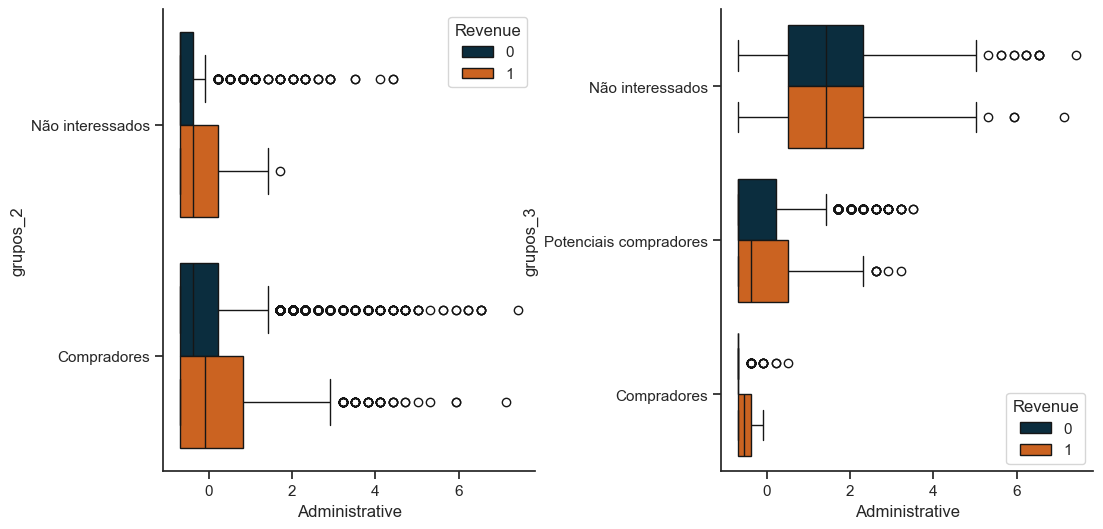

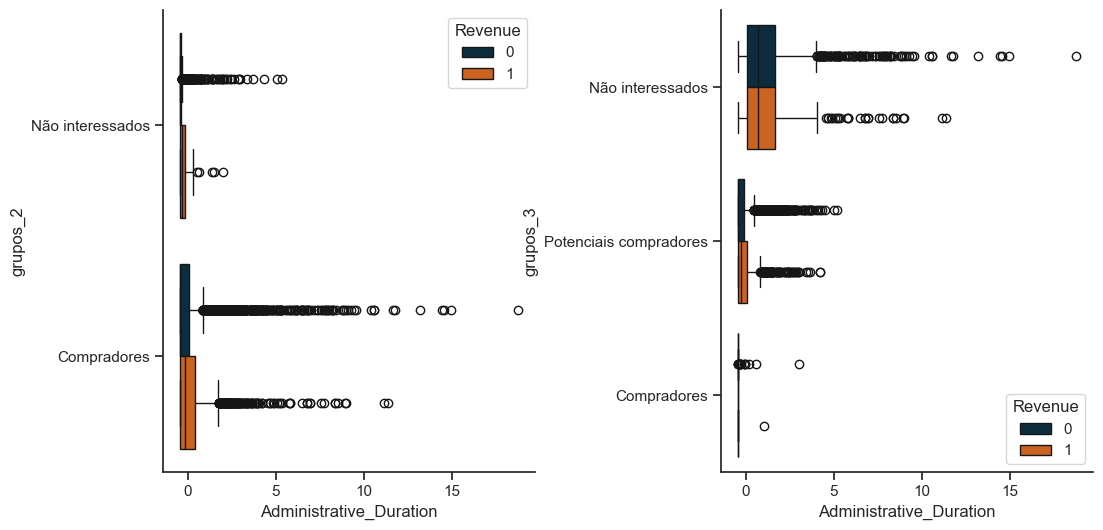

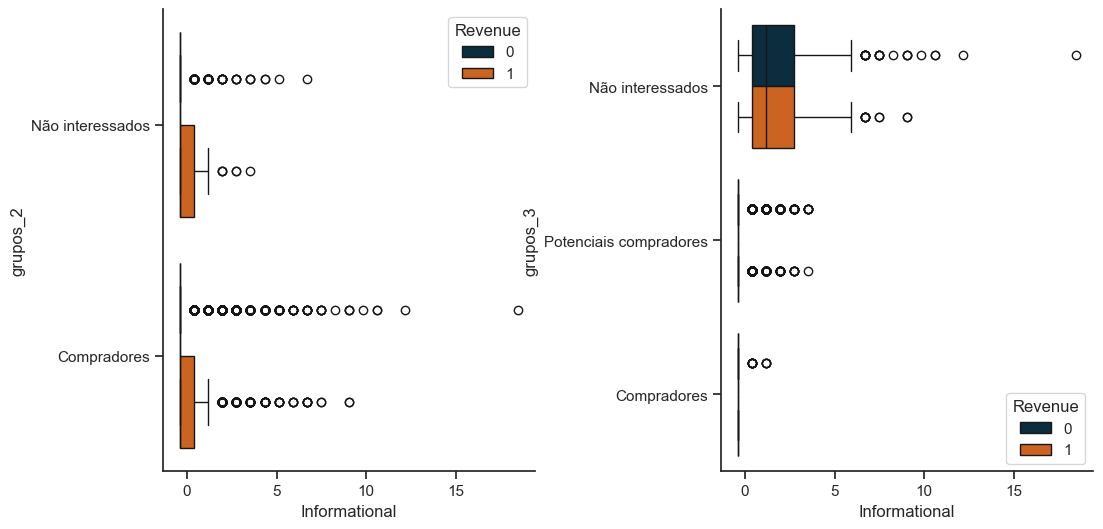

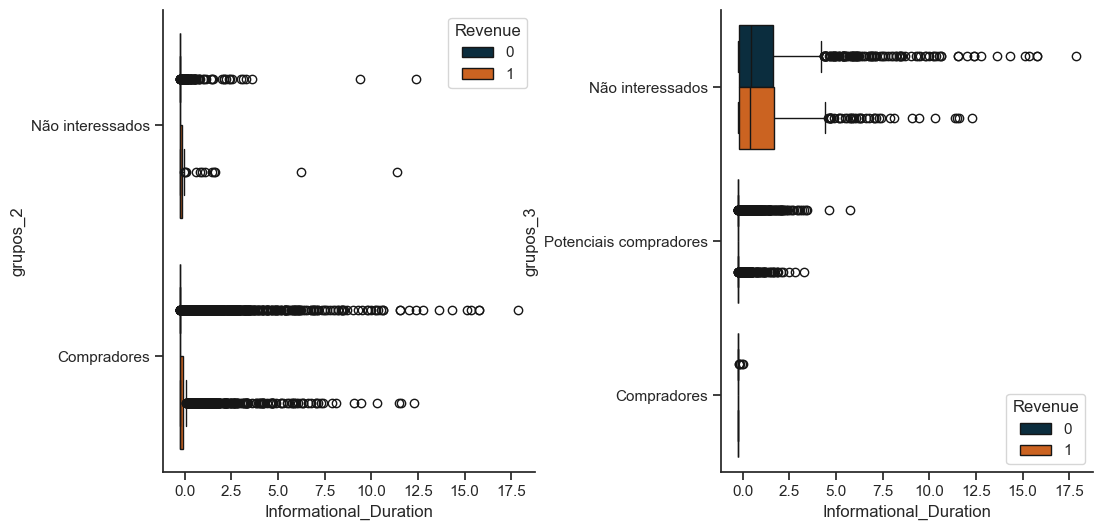

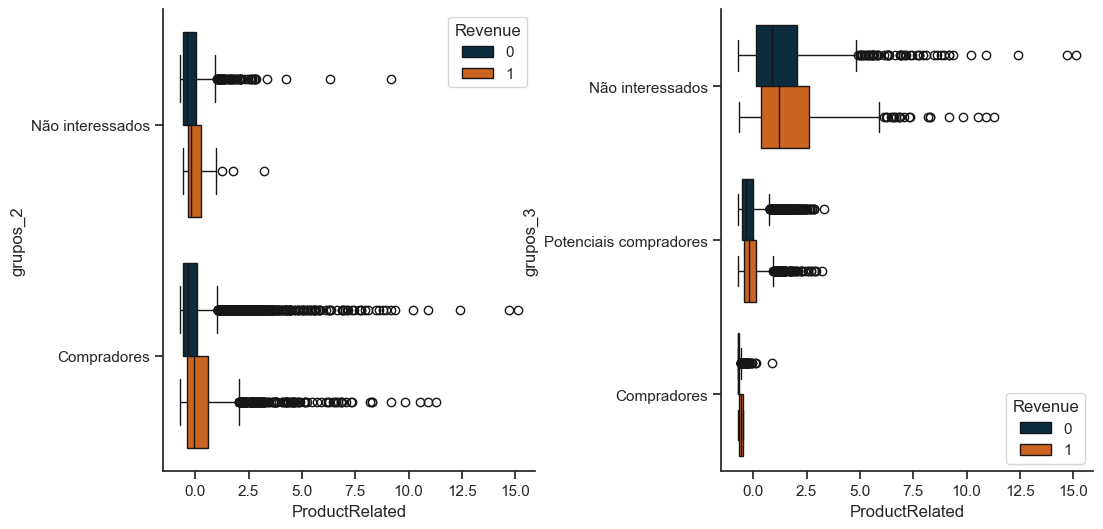

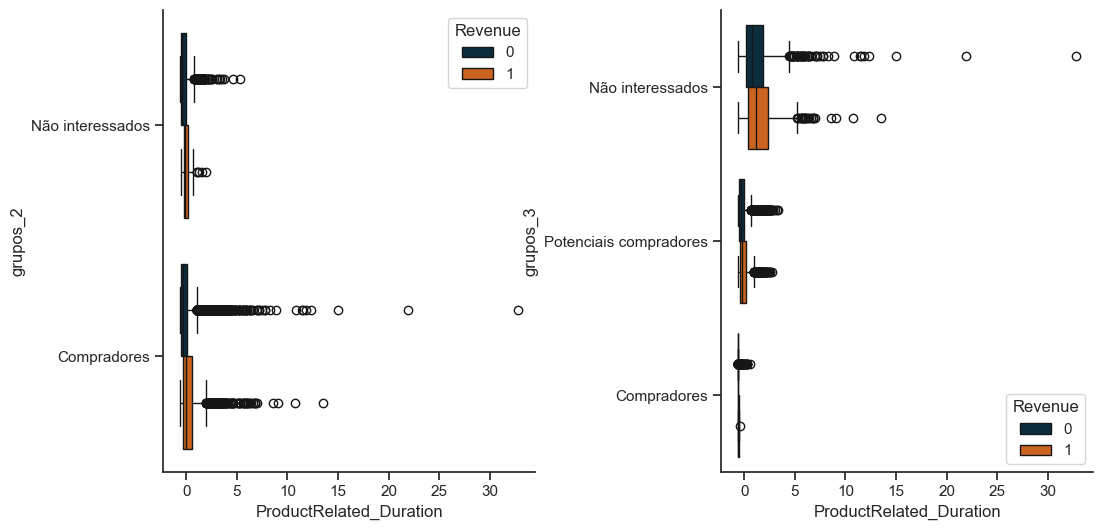

In [143]:
df_kmeans['grupos_2'] = df_kmeans['grupos_2'].cat.rename_categories({
    'grupo_0': 'Não interessados', 
    'grupo_1': 'Compradores'})

df_kmeans['grupos_3'] = df_kmeans['grupos_3'].cat.rename_categories({
    'grupo_0': 'Não interessados', 
    'grupo_1': 'Potenciais compradores', 
    'grupo_2': 'Compradores'})

df_kmeans['grupos_4'] = df_kmeans['grupos_4'].cat.rename_categories({
    'grupo_0': 'Não interessados', 
    'grupo_1': 'Moderadamente interessados', 
    'grupo_2': 'Potenciais compradores',
    'grupo_3': 'Compradores'})

colunas = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
           'ProductRelated', 'ProductRelated_Duration']

for n in range(6):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    sns.boxplot(data=df_kmeans, x=colunas[n], y='grupos_2', ax=ax[0],hue='Revenue')
    sns.boxplot(data=df_kmeans, x=colunas[n], y='grupos_3', ax=ax[1],hue='Revenue')
    plt.subplots_adjust(wspace=0.5)

    plt.show()



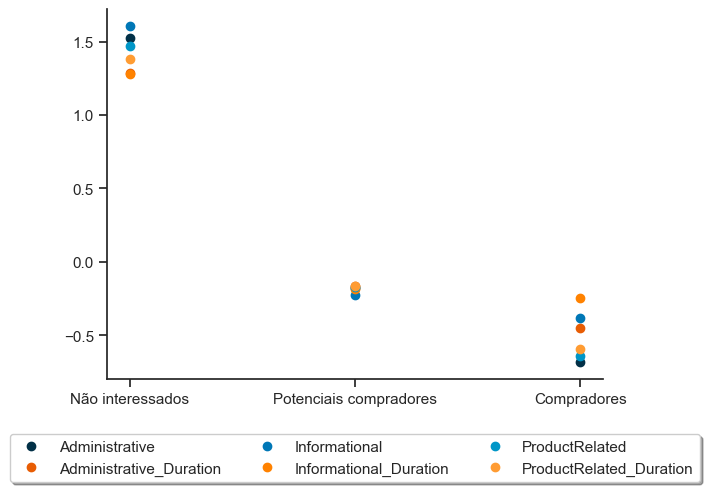

In [83]:
# Avaliação de resultados - Gráfico de dispersão
fig, ax = plt.subplots()
ax.plot(df_kmeans.groupby(['grupos_3'],observed=False)[colunas].mean(), 'o')
ax.legend(colunas, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, fancybox=True, shadow=True)

plt.show()


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [153]:
pd.crosstab(df_kmeans['Revenue'], df_kmeans['grupos_3'], normalize='all', margins=True).round(decimals=2)

grupos_3  Não interessados  Potenciais compradores  Compradores   All
Revenue                                                              
0                     0.09                    0.67         0.09  0.85
1                     0.04                    0.12         0.00  0.15
All                   0.13                    0.78         0.09  1.00

In [151]:
pd.crosstab(df_kmeans['Revenue'], df_kmeans['grupos_2'], normalize='all', margins=True).round(decimals=2)

grupos_2  Não interessados  Compradores   All
Revenue                                      
0                     0.08         0.76  0.85
1                     0.00         0.15  0.15
All                   0.09         0.91  1.00

In [86]:
(df_kmeans.groupby([pd.qcut(x=df_kmeans['BounceRates'], 
                          q=10, 
                          duplicates='drop'), 
                  'Revenue', 
                  'grupos_3'])
        .count()
        .mean(axis=1)
        .to_frame()
        .unstack()
        .rename(columns={0: 'Quantidade'})
        .astype(int))


C:\Users\User\AppData\Local\Temp\ipykernel_2932\663400160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_kmeans.groupby([pd.qcut(x=df_kmeans['BounceRates'],


Quantidade                                   
grupos_3                 Não interessados Potenciais compradores Compradores
BounceRates      Revenue                                                    
(-0.459, -0.393] 0                    477                   4476           8
                 1                    216                    988           0
(-0.393, -0.31]  0                    274                    701           0
                 1                    121                    154           0
(-0.31, -0.192]  0                    221                    788           0
                 1                     70                    137           0
(-0.192, 0.0183] 0                    140                    959           0
                 1                     35                    106           0
(0.0183, 0.743]  0                     50                   1096          13
                 1                      3                     64           0
(0.743, 3.667]   0                      1                    190        1028
                 1                      0                      8           6

1. **Distribuição dos Clusters**:
Os clusters gerados refletem diferentes grupos de usuários com comportamentos distintos, e você fez uma boa escolha ao renomeá-los como "Não interessados", "Potenciais compradores", "Compradores", etc. Isso ajuda a interpretar os resultados.

2. **Análise de Contingência**:
A tabela de contingência entre Revenue e grupos_3 mostra que 85% dos usuários não realizaram uma compra (Revenue = 0), enquanto 15% realizaram uma compra (Revenue = 1). A maior parte dos potenciais compradores (Potenciais compradores) está associada a usuários que não realizaram compras (67%). Isso sugere que, apesar de serem potenciais compradores, a conversão ainda não é alta. A taxa de compradores efetivos está concentrada em 12% dos potenciais compradores, e nenhum dos "compradores" na categorização final fez compras, o que pode indicar que o agrupamento final dos compradores pode ser otimizado ou revisado.

3. **Cluster Grupos 2**:
A análise entre Revenue e grupos_2 mostra uma distinção mais simples, separando apenas entre "Não interessados" e "Compradores". Aqui, 15% dos usuários se mostram como compradores, o que coincide com a porcentagem da outra análise.

4. **BounceRates e Compradores**:
A análise com BounceRates revela um padrão interessante. Nos usuários com baixas taxas de rejeição (bounce rates menores), a quantidade de potenciais compradores é significativamente maior. No entanto, os compradores efetivos se encontram majoritariamente em grupos com bounce rates mais altos, o que pode indicar que usuários com um comportamento de navegação mais longo (ou "hesitante") são mais propensos a converter.